In [1]:
#Importamos la librería pandas que necesitamos para la lectura, conversión y limpieza de los datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re 

#Importamos librerías necesarias para la visualización
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [2]:
#Abrimos el csv y lo convertimos a un DataFrame.
df_HR = pd.read_csv('HR_RAW_DATA.csv', index_col= 0)
df_HR.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
846,46,No,NaN,"644,0$",NaN,1,4,NaN,1,"288,0",4,0,Not Available,3,3,HealThcARe repReSeNTAtivE,1,NaN,NaN,12368,7,NaN,No,16,"3,0",3,"80,0",1,"17,0",3,"3,0",4,NaN,0,3,NaN,1977,1000000000$,NaN,NaN,1
1162,32,No,travel_rarely,"529,0$",NaN,2,3,Technical Degree,1,"2038,0",4,0,78,3,1,ResEArCH Scientist,1,NaN,NaN,11288,1,NaN,No,14,"3,0",4,"80,0",0,NaN,4,"3,0",4,NaN,1,2,NaN,1991,1000000000$,NaN,NaN,True
201,33,Yes,NaN,"1076,0$",NaN,3,3,Life Sciences,1,"702,0",1,0,70,3,1,RESeArCh sCIentIst,1,Single,"3348,0",3164,1,Y,Yes,11,"3,0",1,"80,0",0,NaN,3,"3,0",10,NaN,9,7,"3348,0",1990,1000000000$,NaN,NaN,False
322,30,No,non-travel,"1116,0$",NaN,2,3,NaN,1,NaN,3,1,49,3,1,LABoRaTOrY tEcHnICian,4,Single,NaN,7181,0,Y,NaN,14,"3,0",3,"80,0",0,"12,0",2,"2,0",11,NaN,6,7,NaN,1993,1000000000$,NaN,NaN,False
1140,56,Yes,travel_rarely,nan$,NaN,24,2,NaN,1,"1907,0",1,0,Not Available,3,1,laBoRaTORY TecHnician,4,Single,"2587,0",10261,1,NaN,No,16,"3,0",4,NaN,0,"5,0",3,"3,0",4,NaN,1,0,"2587,0",1967,1000000000$,NaN,NaN,1
609,59,No,travel_rarely,"1089,0$",Sales,1,2,NaN,1,"1048,0",2,0,66,3,3,manAGER,4,NaN,NaN,11038,3,NaN,Yes,14,"3,0",3,NaN,1,"14,0",1,"1,0",6,NaN,0,4,NaN,1964,1000000000$,manAGER - Sales,NaN,True
1388,51,No,travel_frequently,"968,0$",NaN,6,2,Medical,1,NaN,2,1,40,2,1,lABoraTORY tEcHnicIAN,3,Single,"2838,0",4257,0,Y,NaN,14,"3,0",2,NaN,0,"8,0",6,"2,0",7,NaN,7,7,"2838,0",1972,1000000000$,NaN,NaN,False
208,52,No,NaN,"890,0$",Research & Development,-26,4,NaN,1,"867,0",3,1,81,2,4,MANUFACturING DIRecToR,4,Married,NaN,19028,3,Y,No,22,"4,0",3,"80,0",0,"31,0",3,"3,0",9,NaN,0,0,NaN,1971,1000000000$,MANUFACturING DIRecToR - Research & Develop...,NaN,False
741,27,No,NaN,"1167,0$",NaN,4,2,NaN,1,"1259,0",1,0,76,3,1,ResEaRcH SciENTIst,3,Divorced,"2517,0",3208,1,Y,NaN,11,"3,0",2,NaN,3,NaN,2,NaN,5,NaN,0,3,"2517,0",1996,1000000000$,NaN,NaN,Yes
1583,27,No,travel_rarely,nan$,NaN,1,2,Life Sciences,1,"725,0",3,1,68,3,3,MAnufACtUriNG dIrecTOR,1,Married,NaN,6009,1,NaN,NaN,11,"3,0",4,NaN,0,"9,0",3,"3,0",9,NaN,0,7,NaN,1996,1000000000$,NaN,NaN,0


In [3]:
#FASE 1.
#Creamos la función para leer el archivo csv.
def lectura_archivo(csv):
    data = pd.read_csv(csv, index_col= 0)
    return data

In [4]:
# lectura_archivo('HR_RAW_DATA.csv')

In [5]:
#Creamos la función para explorar los datos. 

def exploracion_datos(df):
    print('_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________\n')
    print(df.info())

    print('___________________ FORMA DEL DATAFRAME ____________________\n')
    
    print(f"El número de filas que tenemos es de {df.shape[0]}.\nEl número de columnas es de {df.shape[1]}\n")
    

    print('_______________ NULOS, ÚNICOS Y DUPLICADOS _________________\n')
    
    print('La cantidad de valores NULOS por columna es de:\n')
    print(df.isnull().sum())
    print('____________________________________________________________\n')

    print('La cantidad de valores ÚNICOS por columna es de:\n')
        
    for columna in df.columns:
        cantidad_valores_unicos = len(df[columna].unique())
    
        print(f'La columna {columna}: {cantidad_valores_unicos}')

    """ Otra forma más rápida de obtener la lista de valores únicos por columna es usando df.nunique()"""

    print('____________________________________________________________\n')

    print('La cantidad de valores DUPLICADOS por columna es de:\n')

    """En análisis posteriores hemos detectado que hay columnas con valores duplicados que nos interesa filtrar, 
    así que vamos a realizar otro bucle for para iterar por todas las columnas del DF y obtener los duplicados de cada una de ellas."""

    for columna in df.columns:
        cantidad_duplicados = df[columna].duplicated().sum()
    
        print(f'La columna {columna}: {cantidad_duplicados}')


    print('____________________ RESUMEN ESTADÍSTICO ____________________')
    print('____________________ Variables Numéricas __________________\n')
    print(df.describe().T)
    
    print('___________________ Variables Categóricas _________________\n')
    print(df.describe(include='object').T)

    


In [6]:
exploracion_datos(df_HR)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1614 non-null   object 
 1   Attrition                 1614 non-null   object 
 2   BusinessTravel            842 non-null    object 
 3   DailyRate                 1614 non-null   object 
 4   Department                302 non-null    object 
 5   DistanceFromHome          1614 non-null   int64  
 6   Education                 1614 non-null   int64  
 7   EducationField            869 non-null    object 
 8   employeecount             1614 non-null   int64  
 9   employeenumber            1183 non-null   object 
 10  EnvironmentSatisfaction   1614 non-null   int64  
 11  Gender                    1614 non-null   int64  
 12  HourlyRate                1614 non-null   object 
 13  JobInv

In [7]:
#FASE 2
""" ¿Qué hacemos con la columna del id de empleados que tiene duplicados? """
df_HR['employeenumber'].duplicated().sum()

534

In [8]:
#employeecount: esta columna tiene el mismo valor para todas las filas, por lo que es redundante y se puede eliminar.¿¿??
df_HR['employeecount'].unique()

array([1])

In [9]:
#Eliminamos la columna "employeecount"
df_HR.drop(columns='employeecount', inplace= True)

In [10]:
#NUMBERCHILDREN: Tiene solo valores nulos, se puede eliminar.
df_HR['NUMBERCHILDREN'].isnull().sum()

1614

In [11]:
#Eliminamos la columna "NUMBERCHILDREN"
df_HR.drop(columns='NUMBERCHILDREN', inplace= True)

In [12]:
#SameAsMonthlyIncome: parece un duplicado de la columna MonthlyIncome,se puede eliminar. 
df_HR[['SameAsMonthlyIncome', 'MonthlyIncome', 'MonthlyRate', 'HourlyRate']]

,SameAsMonthlyIncome,MonthlyIncome,MonthlyRate,HourlyRate
0,"19537,0","19537,0",6462,51
1,"19999,0","19999,0",5678,65
2,"19232,0","19232,0",4933,58
3,"17169,0","17169,0",26703,82
4,NaN,NaN,7739,45
...,...,...,...,...
1609,"10325,0","10325,0",5518,51
1610,"4447,0","4447,0",23163,57
1611,NaN,NaN,2560,41
1612,NaN,NaN,25952,84


In [13]:
#Eliminamos la columna
df_HR.drop(columns='SameAsMonthlyIncome', inplace= True)
#Buscamos nombre columnas para comprobar que la hemos eliminado.

In [14]:
#Salary: Tiene un solo valor repetido, por lo que se puede eliminar también.
df_HR['Salary'].unique()

array(['1000000000$'], dtype=object)

In [15]:
#Eliminamos la columna "Salary"
df_HR.drop(columns='Salary', inplace= True)

In [16]:
#Reemplazamos los valores 1 y 0 de la columna Gender por "M" de masculino y "F" de femenino, usando loc.

df_HR.loc[df_HR['Gender'] == 0, 'Gender'] = 'M'
df_HR.loc[df_HR['Gender'] == 1, 'Gender'] = 'F'

print(df_HR['Gender'])


0       M
1       M
2       M
3       F
4       F
       ..
1609    M
1610    M
1611    M
1612    M
1613    M
Name: Gender, Length: 1614, dtype: object


/var/folders/sg/x17x70c54nq9kk2ks_m66x280000gp/T/ipykernel_2055/3872921605.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'M' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_HR.loc[df_HR['Gender'] == 0, 'Gender'] = 'M'


### Función para cambiar a FLOAT

In [17]:
# Creamos la función 'cambiar comas'

lista_tofloat = ['DailyRate', 'HourlyRate', 'MonthlyIncome']

def cambiar_comas(cadena):
     # Remover el símbolo $, reemplazar comas por puntos
     # Usar expresiones regulares para mantener solo los números y puntos
    try:
    # Remover cualquier caracter que no sea dígito o coma
        cleaned_string = re.sub(r'[^\d,]', '', cadena)
        # Reemplazar comas por puntos
        cleaned_string = cleaned_string.replace(",", ".")
        # Convertir a float
        return float(cleaned_string)
    except:
        return np.nan # Devuelve un np.nan si hay un valor inválido

# Aplicar la función a cada columna en la lista
for col in lista_tofloat:
    df_HR[col] = df_HR[col].apply(cambiar_comas)


# Comprobamos que la columna, que antes era de tipo string, ahora es float64.
df_HR[lista_tofloat].dtypes



DailyRate        float64
HourlyRate       float64
MonthlyIncome    float64
dtype: object

In [18]:
df_HR.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
0,51,No,NaN,684.0,NaN,6,3,NaN,"162,0",1,M,51.0,3,5,resEArch DIREcToR,3,NaN,19537.0,6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,"259,0",3,M,65.0,2,5,ManAGeR,3,NaN,19999.0,5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,NaN,1
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,"319,0",3,M,58.0,3,5,ManaGER,4,Married,19232.0,4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,ManaGER - Research & Development,1
3,47,No,travel_rarely,359.0,NaN,2,4,Medical,NaN,1,F,82.0,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,NaN,False
4,46,No,NaN,1319.0,NaN,3,3,Technical Degree,NaN,1,F,45.0,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,NaN,0
5,48,No,NaN,117.0,Research & Development,22,3,Medical,"1900,0",4,F,58.0,3,4,MANAger,4,NaN,17174.0,2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,1975,MANAger - Research & Development,Yes
6,59,No,NaN,1435.0,NaN,25,3,Life Sciences,"81,0",1,F,99.0,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,1964,NaN,True
7,42,No,travel_rarely,635.0,NaN,1,1,NaN,"387,0",2,M,99.0,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,1981,NaN,0
8,41,No,NaN,1276.0,NaN,2,5,NaN,NaN,2,F,91.0,3,4,mANAGEr,1,Married,16595.0,5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,1982,NaN,True
9,41,No,travel_frequently,840.0,NaN,9,3,NaN,"999,0",1,M,64.0,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,1982,NaN,0


In [19]:
#lo guardo para que se guarden los datos

df_HR.to_csv("df_HR_limpio.csv", index = False)

### Función para cambiar a INT

In [20]:
"""# Creamos la función 'cambiar comas'

lista_toint = ['WORKLIFEBALANCE']

def cambiar_comas(cadena):
     # Remover el símbolo $, reemplazar comas por puntos
     # Usar expresiones regulares para mantener solo los números y puntos
    try:
    # Remover cualquier caracter que no sea dígito o coma
        cleaned_string = re.sub(r'[^\d,]', '', cadena)
        # Reemplazar comas por puntos
        cleaned_string = cleaned_string.replace(",", ".")
        # Convertir a float
        return int(cleaned_string)
    except:
        return np.nan # Devuelve un np.nan si hay un valor inválido

# Aplicar la función a cada columna en la lista
for col in lista_toint:
    #convertir a int
    df_HR[col] = df_HR[col].apply(cambiar_comas).astype('Int64')


# Comprobamos que la columna, que antes era de tipo string, ahora es float64.
df_HR[lista_toint].dtypes"""

'# Creamos la función \'cambiar comas\'\n\nlista_toint = [\'WORKLIFEBALANCE\']\n\ndef cambiar_comas(cadena):\n     # Remover el símbolo $, reemplazar comas por puntos\n     # Usar expresiones regulares para mantener solo los números y puntos\n    try:\n    # Remover cualquier caracter que no sea dígito o coma\n        cleaned_string = re.sub(r\'[^\\d,]\', \'\', cadena)\n        # Reemplazar comas por puntos\n        cleaned_string = cleaned_string.replace(",", ".")\n        # Convertir a float\n        return int(cleaned_string)\n    except:\n        return np.nan # Devuelve un np.nan si hay un valor inválido\n\n# Aplicar la función a cada columna en la lista\nfor col in lista_toint:\n    #convertir a int\n    df_HR[col] = df_HR[col].apply(cambiar_comas).astype(\'Int64\')\n\n\n# Comprobamos que la columna, que antes era de tipo string, ahora es float64.\ndf_HR[lista_toint].dtypes'

In [21]:
"""def comasapuntos(num):
    try:
        return float(num.replace(",", "."))
    except:
        return np.nan

columnas = ["WORKLIFEBALANCE"]

for col in columnas:
    df_HR[col] = df_HR[col].apply(comasapuntos)
"""

'def comasapuntos(num):\n    try:\n        return float(num.replace(",", "."))\n    except:\n        return np.nan\n\ncolumnas = ["WORKLIFEBALANCE"]\n\nfor col in columnas:\n    df_HR[col] = df_HR[col].apply(comasapuntos)\n'

In [22]:
df_HR['WORKLIFEBALANCE'] = df_HR['WORKLIFEBALANCE'].replace('NaN', pd.NA)

# Convertir los valores en 'WORKLIFEBALANCE' a float y manejar los NaN
df_HR['WORKLIFEBALANCE'] = df_HR['WORKLIFEBALANCE'].astype(str).str.replace(',', '.').astype(float)

# Convertir los valores a int, ignorando los NaN
df_HR['WORKLIFEBALANCE'] = df_HR['WORKLIFEBALANCE'].astype('Int64')
df_HR['WORKLIFEBALANCE']

0          3
1          3
2       <NA>
3       <NA>
4          3
        ... 
1609       3
1610       2
1611       3
1612       3
1613       3
Name: WORKLIFEBALANCE, Length: 1614, dtype: Int64

In [23]:
#pasar a csv para que se guarde

df_HR.to_csv('df_HR_limpio.csv')

In [24]:
df_HR = pd.read_csv('df_HR_limpio.csv')
df_HR.sample(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
108,108,46,No,NaN,638.0,NaN,1,3,Medical,NaN,3,M,40.0,2,3,HEalThCare REPreseNTAtive,1,Married,NaN,3142,2,NaN,Yes,13,"3,0",3,NaN,1,"21,0",5,2.0,10,NaN,9,5,1977,NaN,False
356,356,29,No,travel_rarely,NaN,NaN,23,2,NaN,NaN,3,M,81.0,4,1,RESEARCh SciENTist,3,Married,2700.0,23779,1,NaN,NaN,24,"4,0",3,NaN,1,"10,0",3,3.0,10,NaN,0,7,1994,NaN,1
941,941,26,No,travel_frequently,575.0,NaN,1,2,Life Sciences,"792,0",1,F,71.0,1,1,lABoRatory teCHNiCiaN,4,NaN,NaN,5288,3,NaN,No,14,"3,0",1,"80,0",1,NaN,2,3.0,2,NaN,2,0,1997,NaN,1
714,714,50,No,travel_rarely,691.0,Research & Development,2,3,NaN,"815,0",3,M,64.0,3,4,rESEARch DiRector,3,NaN,17639.0,6881,5,Y,NaN,16,"3,0",4,NaN,0,NaN,3,3.0,4,NaN,0,3,1973,rESEARch DiRector - Research & Development,0
661,661,31,No,non-travel,NaN,NaN,5,3,Medical,NaN,2,M,74.0,3,2,mAnuFaCTUrING direCTor,1,NaN,9936.0,3787,0,Y,No,19,"3,0",2,NaN,0,"10,0",2,3.0,9,NaN,1,7,1992,NaN,Yes
1233,1233,24,Yes,travel_rarely,813.0,NaN,1,3,NaN,NaN,2,M,61.0,3,1,ReSEaRCH scientiSt,4,NaN,NaN,3020,2,NaN,Yes,16,"3,0",1,NaN,1,"6,0",2,NaN,2,NaN,2,0,1999,NaN,False
960,960,25,No,NaN,583.0,NaN,4,1,NaN,"885,0",3,M,87.0,2,2,sAleS execUTIVE,1,NaN,4256.0,18154,1,Y,No,12,"3,0",1,NaN,0,"5,0",1,4.0,5,NaN,0,3,1998,NaN,0
268,268,42,No,NaN,NaN,NaN,8,4,NaN,"35,0",3,M,48.0,3,2,Sales ExECutiVe,2,NaN,6825.0,21173,0,Y,NaN,11,NaN,4,NaN,1,"10,0",2,3.0,9,NaN,4,2,1981,NaN,False
59,59,40,No,NaN,630.0,NaN,4,4,NaN,"215,0",3,M,67.0,2,3,SALES eXECUtiVE,4,Married,10855.0,8552,7,Y,No,11,NaN,1,NaN,1,"15,0",2,2.0,12,NaN,2,11,1983,NaN,Yes
1283,1283,42,No,travel_rarely,810.0,NaN,23,5,NaN,"468,0",1,F,44.0,3,4,rEsEARcH DiRecTOR,4,Single,15992.0,15901,2,Y,No,14,"3,0",2,NaN,0,"16,0",2,3.0,1,NaN,0,0,1981,NaN,0


In [25]:
#Cambiamos el tipo de dato de la columna Age para que sea interger.

df_HR.loc[df_HR['Age'] == 'forty-seven', 'Age'] = '47'
df_HR.loc[df_HR['Age'] == 'fifty-eight', 'Age'] = '58'
df_HR.loc[df_HR['Age'] == 'thirty-six', 'Age'] = '36'
df_HR.loc[df_HR['Age'] == 'fifty-five', 'Age'] = '55'
df_HR.loc[df_HR['Age'] == 'fifty-two', 'Age'] = '52'
df_HR.loc[df_HR['Age'] == 'thirty-one', 'Age'] = '31'
df_HR.loc[df_HR['Age'] == 'thirty', 'Age'] = '30'
df_HR.loc[df_HR['Age'] == 'twenty-six', 'Age'] = '26'
df_HR.loc[df_HR['Age'] == 'thirty-seven', 'Age'] = '37'
df_HR.loc[df_HR['Age'] == 'thirty-two', 'Age'] = '32'
df_HR.loc[df_HR['Age'] == 'thirty-seven', 'Age'] = '37'
df_HR.loc[df_HR['Age'] == 'twenty-four', 'Age'] = '24'

df_HR['Age']= df_HR['Age'].astype(int)
df_HR['Age'].dtype

dtype('int64')

In [26]:
#Buscamos los valores negativos de la columna 'DistanceFromHome'
valores_negativos = df_HR[df_HR['DistanceFromHome'] < 0]['DistanceFromHome']
print(valores_negativos)
print('_________________________________________________')
print(f'Hay {valores_negativos.shape[0]} filas con valores negativos')

18     -13
24     -42
30     -37
41     -35
57     -26
        ..
1572   -29
1576   -24
1590   -35
1601   -43
1611   -13
Name: DistanceFromHome, Length: 192, dtype: int64
_________________________________________________
Hay 192 filas con valores negativos


In [27]:
#Sustituimos valores negativos por positivos
df_HR.loc[df_HR['DistanceFromHome'] < 0, 'DistanceFromHome'] = df_HR['DistanceFromHome'].abs()

#Comprobamos que ya no hay valores negativos
df_HR[df_HR['DistanceFromHome'] < 0]

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork


In [28]:
#Corregimos errores tipográficos en la columna MaritalStatus... 
df_HR['MaritalStatus'].unique()

array([nan, 'Married', 'Divorced', 'Single', 'divorced', 'Marreid'],
      dtype=object)

In [29]:
#Como 'Marreid'.
df_HR.loc[df_HR['MaritalStatus'] == 'Marreid', 'MaritalStatus'] = 'Married'
df_HR['MaritalStatus'].unique()

#O 'divorced'.
df_HR.loc[df_HR['MaritalStatus'] == 'divorced', 'MaritalStatus'] = 'Divorced'
df_HR['MaritalStatus'].unique()

array([nan, 'Married', 'Divorced', 'Single'], dtype=object)

In [30]:
""" Mirar qué otras columnas podemos cambiar de typo porque no estén en el correcto, como NUMBERCHILDRENS.
Ver si alguna otra columna tiene muchos nulos y no nos interesa (de cara a eliminarla). """

' Mirar qué otras columnas podemos cambiar de typo porque no estén en el correcto, como NUMBERCHILDRENS.\nVer si alguna otra columna tiene muchos nulos y no nos interesa (de cara a eliminarla). '

In [31]:
#FASE 4
#Seudocódigo.
""" Usar como filtro los valores de la columna **Attrition**. Los valores == YES han abandonado la empresa. 
    Buscar su nivel de Satisfacción. Columnas Age, Gender, EnviromentSatisfaction, JobInvolvement, 
    JobSatisfaction, 'RelationshipSatisfaction, WORKLIFEBALANCE, YearsSinceLastPromotion, ¿ YEARSWITHCURRMANAGER ?, 
    Salary, RoleDepartament, NUMBERCHILDREN, DistanceFromHome - RemoteWork. """

" Usar como filtro los valores de la columna **Attrition**. Los valores == YES han abandonado la empresa. \n    Buscar su nivel de Satisfacción. Columnas Age, Gender, EnviromentSatisfaction, JobInvolvement, \n    JobSatisfaction, 'RelationshipSatisfaction, WORKLIFEBALANCE, YearsSinceLastPromotion, ¿ YEARSWITHCURRMANAGER ?, \n    Salary, RoleDepartament, NUMBERCHILDREN, DistanceFromHome - RemoteWork. "

In [32]:
df_HR.to_csv('df_HR_limpio.csv', index=False)

In [33]:
#ABRO el nuevo archivo, el limpio para seguir trabajando

df_limpio = pd.read_csv('df_HR_limpio.csv', index_col= 0)
df_limpio.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,51,No,NaN,684.0,NaN,6,3,NaN,"162,0",1,M,51.0,3,5,resEArch DIREcToR,3,NaN,19537.0,6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,3.0,20,NaN,15,15,1972,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,"259,0",3,M,65.0,2,5,ManAGeR,3,NaN,19999.0,5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,3.0,33,NaN,11,9,1971,NaN,1


In [34]:
# Función para mapear los valores a 'yes' y 'no', RemoteWork
def map_values(value):
    if str(value).lower() in ['1', 'true', 'yes']:
        return 'yes'
    elif str(value).lower() in ['0', 'false', 'no']:
        return 'no'
    else:
        return value  

# Aplicar la función a la columna
df_limpio['RemoteWork'] = df_limpio['RemoteWork'].apply(map_values)



In [35]:
df_limpio.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
739,42,No,non-travel,NaN,Human Resources,2,5,NaN,"1231,0",4,M,79.0,4,2,hUMAn rEsOuRCES,1,Married,6272.0,12858,7,NaN,No,16,"3,0",1,NaN,1,NaN,3,4.0,4,NaN,0,3,1981,hUMAn rEsOuRCES - Human Resources,yes
244,39,No,NaN,792.0,NaN,1,3,Life Sciences,"1737,0",4,M,77.0,3,2,LabOraTory TechNiCIAN,4,Married,6472.0,8989,1,Y,NaN,15,"3,0",4,NaN,1,NaN,2,3.0,9,NaN,5,8,1984,NaN,yes
476,31,No,NaN,697.0,NaN,10,3,NaN,"1979,0",3,F,40.0,3,3,resEarch diReCtor,3,Married,NaN,26862,4,NaN,No,20,"4,0",3,NaN,1,"13,0",2,4.0,11,NaN,4,8,1992,NaN,yes
642,43,No,NaN,990.0,NaN,27,3,NaN,"1599,0",4,M,87.0,4,1,LaBoRatorY tEcHnicIan,2,Divorced,4876.0,5855,5,NaN,NaN,12,"3,0",3,NaN,1,NaN,0,NaN,6,NaN,0,2,1980,NaN,no
223,28,No,non-travel,1476.0,NaN,1,3,NaN,"1315,0",3,F,55.0,1,2,lAbORAtORy tECHNiCian,4,Married,6674.0,16392,0,NaN,No,11,"3,0",1,NaN,3,"10,0",6,3.0,9,NaN,7,5,1995,NaN,yes


In [70]:
df_limpio.to_csv('df_HR_limpio.csv', index = False)

In [72]:
df_HR = pd.read_csv('df_HR_limpio.csv', index_col= False)

In [73]:
df_HR["JobRole"] = df_HR["JobRole"].str.title()
df_HR["RoleDepartament"] = df_HR["RoleDepartament"].str.title()
df_HR.rename(columns={'TOTALWORKINGYEARS': 'TotalWorkingYears'}, inplace=True)
df_HR.rename(columns={'employeenumber': 'EmployeeNumber'}, inplace=True)
df_HR.rename(columns={'NUMCOMPANIESWORKED': 'NumCompaniesWorked'}, inplace=True)
df_HR.rename(columns={'WORKLIFEBALANCE': 'WorkLifeBalance'}, inplace=True)
df_HR.rename(columns={'YEARSWITHCURRMANAGER': 'YearsWithCurrManager'}, inplace=True)

In [74]:
df_HR.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RoleDepartament,RemoteWork
57,49,No,NaN,NaN,NaN,26,4,Medical,"170,0",3,F,96.0,3,2,Manufacturing Director,1,NaN,NaN,5549,1,NaN,No,14,"3,0",3,NaN,0,"16,0",2,2.0,15,NaN,5,11,1974,NaN,no
39,40,No,travel_frequently,580.0,NaN,5,4,NaN,"729,0",4,M,48.0,2,3,Sales Executive,1,Married,10475.0,23772,5,NaN,Yes,21,"4,0",3,"80,0",1,"20,0",2,3.0,18,NaN,1,12,1983,NaN,no
786,42,No,NaN,557.0,NaN,18,4,NaN,"1998,0",4,M,35.0,3,2,Research Scientist,1,NaN,5410.0,11189,6,NaN,NaN,17,"3,0",3,NaN,1,"9,0",3,2.0,4,NaN,1,2,1981,NaN,yes
1161,29,Yes,travel_rarely,1092.0,NaN,38,4,NaN,"2027,0",38,M,36.0,3,1,Research Scientist,4,Married,4787.0,26124,9,Y,NaN,14,"3,0",2,NaN,3,"4,0",3,4.0,2,NaN,2,2,1994,NaN,yes
1357,38,No,NaN,NaN,NaN,3,4,Life Sciences,NaN,2,M,42.0,3,2,Sales Executive,4,NaN,NaN,4981,8,NaN,Yes,12,"3,0",3,"80,0",0,"19,0",1,3.0,1,NaN,0,0,1985,NaN,no
249,34,No,travel_rarely,NaN,NaN,8,2,NaN,"1823,0",2,M,92.0,4,2,Sales Executive,3,NaN,NaN,22128,1,NaN,No,21,"4,0",3,NaN,2,"10,0",5,3.0,10,NaN,4,8,1989,NaN,no
991,20,Yes,NaN,769.0,NaN,9,3,Marketing,"1077,0",4,F,54.0,3,1,Sales Representative,4,Single,NaN,17205,1,Y,Yes,14,"3,0",2,"80,0",0,"2,0",3,3.0,2,NaN,0,2,2003,NaN,yes
280,40,No,travel_frequently,1395.0,NaN,26,3,NaN,"202,0",2,F,54.0,3,2,Research Scientist,2,Divorced,5605.0,8504,1,Y,No,11,"3,0",1,NaN,1,"20,0",2,3.0,20,NaN,2,13,1983,NaN,no
907,30,No,travel_rarely,413.0,Sales,7,1,Marketing,"585,0",4,M,57.0,3,1,Sales Representative,2,Single,NaN,18398,0,Y,NaN,14,"3,0",1,"80,0",0,NaN,3,3.0,3,NaN,1,2,1993,Sales Representative - Sales,yes
819,44,No,NaN,489.0,NaN,23,3,NaN,"132,0",2,M,NaN,3,2,Laboratory Technician,2,Married,NaN,25043,4,NaN,NaN,12,"3,0",3,NaN,1,NaN,3,4.0,3,NaN,1,2,1979,NaN,yes


In [75]:
df_HR.to_csv("df_HR_limpio.csv", index = False)

In [76]:
# Eliminamos tres columna más
lista_eliminar = ["Over18", "StandardHours", "RoleDepartament", "Department", "YearsInCurrentRole"]
df_HR.drop(columns= lista_eliminar, inplace= True)

In [77]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DateBirth', 'RemoteWork'],
      dtype='object')

In [78]:
# FUNCIÓN DE CONTEO DE FRECUENCIAS DE CADA COLUMNA

# EJECUTAR Y ABRIR EN TEXT EDITOR PARA VISUALIZAR LOS RESULTADOS EN UN ARCHIVO INDEPENDIENTE

def count_frequencies(df):
    # Creamos un diccionario para almacenar los resultados
    frequency_counts = {}
    
    # Recorremos todas las columnas del DataFrame
    for column in df_HR.columns:
        # Aplicar .value_counts() a cada columna y almacenarlo en el diccionario
        frequency_counts[column] = df[column].value_counts()
    
    return frequency_counts

# Llamamos a la función y obtenemos el conteo de frecuencia de cada columna
frequency_counts = count_frequencies(df_HR)

# Mostramos los resultados
for column, counts in frequency_counts.items():
    print(f"Conteo de frecuencias para la columna {column}:")
    print(counts)
    print()  # Línea en blanco para separar los resultados

Conteo de frecuencias para la columna Age:
Age
35    84
31    83
34    83
29    78
36    75
32    66
38    64
30    64
33    61
40    60
27    54
37    54
28    53
42    50
45    48
41    46
26    46
39    45
43    40
46    38
44    34
50    31
24    27
47    27
25    27
55    25
49    25
54    20
51    20
53    20
48    20
52    19
56    17
22    16
21    16
58    15
23    15
20    11
59    10
19     9
18     8
60     5
57     5
Name: count, dtype: int64

Conteo de frecuencias para la columna Attrition:
Attrition
No     1355
Yes     259
Name: count, dtype: int64

Conteo de frecuencias para la columna BusinessTravel:
BusinessTravel
travel_rarely        586
travel_frequently    165
non-travel            91
Name: count, dtype: int64

Conteo de frecuencias para la columna DailyRate:
DailyRate
691.0    7
329.0    7
147.0    6
408.0    6
530.0    6
        ..
317.0    1
891.0    1
759.0    1
483.0    1
105.0    1
Name: count, Length: 848, dtype: int64

Conteo de frecuencias para la columna 

In [79]:
# Eliminamos los duplicados de la columna EmployeeNumber
df_HR = df_HR.drop_duplicates(subset=['EmployeeNumber'])

In [80]:
# Comprobamos que se han eliminado los nulos
df_HR["EmployeeNumber"].duplicated().sum()

0

In [81]:
df_HR.shape

(1080, 32)

In [82]:
""" Para obtener los duplicados de todas las columnas

for columna in df_HR:
    num_filas_duplicadas = df_HR[columna].duplicated().sum()
    print(f'{columna.upper()}: {num_filas_duplicadas}')"""

" Para obtener los duplicados de todas las columnas\n\nfor columna in df_HR:\n    num_filas_duplicadas = df_HR[columna].duplicated().sum()\n    print(f'{columna.upper()}: {num_filas_duplicadas}')"

In [83]:
# Para obtener los nulos de todas las columnas

for columna in df_HR:
    num_filas_nulas = df_HR[columna].isnull().sum()
    print(f'{columna.upper()}: {num_filas_nulas}')

AGE: 0
ATTRITION: 0
BUSINESSTRAVEL: 534
DAILYRATE: 85
DISTANCEFROMHOME: 0
EDUCATION: 0
EDUCATIONFIELD: 496
EMPLOYEENUMBER: 1
ENVIRONMENTSATISFACTION: 0
GENDER: 0
HOURLYRATE: 62
JOBINVOLVEMENT: 0
JOBLEVEL: 0
JOBROLE: 0
JOBSATISFACTION: 0
MARITALSTATUS: 425
MONTHLYINCOME: 560
MONTHLYRATE: 0
NUMCOMPANIESWORKED: 0
OVERTIME: 447
PERCENTSALARYHIKE: 0
PERFORMANCERATING: 137
RELATIONSHIPSATISFACTION: 0
STOCKOPTIONLEVEL: 0
TOTALWORKINGYEARS: 360
TRAININGTIMESLASTYEAR: 0
WORKLIFEBALANCE: 69
YEARSATCOMPANY: 0
YEARSSINCELASTPROMOTION: 0
YEARSWITHCURRMANAGER: 0
DATEBIRTH: 0
REMOTEWORK: 0


## Gestión de nulos de columnas categóricas

In [84]:
# Calculamos el porcentaje de nulos que tenemos para cada columna categórica
porc_nulos = (df_HR.isnull().sum() / df_HR.shape[0]) * 100
porc_nulos

# Lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# Filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
BusinessTravel,49.444444
DailyRate,7.870370
EducationField,45.925926
EmployeeNumber,0.092593
HourlyRate,5.740741
MaritalStatus,39.351852
MonthlyIncome,51.851852
OverTime,41.388889
PerformanceRating,12.685185
TotalWorkingYears,33.333333


In [85]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df_HR[df_HR.columns[df_HR.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['BusinessTravel', 'EducationField', 'EmployeeNumber', 'MaritalStatus',
       'OverTime', 'PerformanceRating', 'TotalWorkingYears'],
      dtype='object')


In [86]:
# Sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_HR[col].value_counts() / df_HR.shape[0] * 100)  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna BUSINESSTRAVEL


BusinessTravel
travel_rarely        34.814815
travel_frequently    10.185185
non-travel            5.555556
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


EducationField
Life Sciences       22.037037
Medical             16.388889
Marketing            7.129630
Technical Degree     4.444444
Other                3.518519
Human Resources      0.555556
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EMPLOYEENUMBER


EmployeeNumber
162,0     0.092593
1027,0    0.092593
896,0     0.092593
902,0     0.092593
916,0     0.092593
            ...   
905,0     0.092593
942,0     0.092593
1026,0    0.092593
1085,0    0.092593
2040,0    0.092593
Name: count, Length: 1079, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


MaritalStatus
Married     26.759259
Single      21.666667
Divorced    12.222222
Name: count, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


OverTime
No     41.574074
Yes    17.037037
Name: count, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


PerformanceRating
3,0    73.981481
4,0    13.333333
Name: count, dtype: float64

........................
La distribución de las categorías para la columna TOTALWORKINGYEARS


TotalWorkingYears
10,0    9.166667
6,0     5.277778
8,0     4.537037
9,0     4.444444
5,0     4.351852
7,0     3.425926
1,0     3.333333
4,0     3.240741
12,0    2.129630
14,0    2.037037
3,0     1.944444
20,0    1.944444
15,0    1.851852
11,0    1.666667
13,0    1.574074
21,0    1.574074
16,0    1.481481
18,0    1.481481
17,0    1.388889
2,0     1.203704
22,0    1.111111
19,0    1.018519
23,0    1.018519
26,0    0.740741
24,0    0.648148
28,0    0.648148
0,0     0.462963
29,0    0.370370
33,0    0.370370
25,0    0.370370
32,0    0.277778
31,0    0.277778
37,0    0.277778
27,0    0.277778
36,0    0.185185
30,0    0.185185
35,0    0.092593
38,0    0.092593
40,0    0.092593
34,0    0.092593
Name: count, dtype: float64

........................


In [87]:
# Sustituimos los valores nulos de las siguientes columnas por "Unkown", ya que no hay mayorías claras que nos permitan imputar.

columnas_desconocido = ['BusinessTravel', 'EducationField', 'EmployeeNumber',
       'MaritalStatus', 'OverTime', 'PerformanceRating', 'TotalWorkingYears']
    
    
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df_HR[columna] = df_HR[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_HR[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


BusinessTravel       0
EducationField       0
EmployeeNumber       0
MaritalStatus        0
OverTime             0
PerformanceRating    0
TotalWorkingYears    0
dtype: int64

In [88]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DateBirth', 'RemoteWork'],
      dtype='object')

In [89]:
df_HR.head()    

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3.0,20,15,15,1972,yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3.0,33,11,9,1971,yes
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,NaN,22,11,15,1981,yes
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,NaN,20,5,6,1976,no
5,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3.0,22,4,7,1975,yes


In [90]:
df_HR.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeNumber               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating            object
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears            object
TrainingTimesLastYear         int64
WorkLifeBalance             float64
YearsAtCompany              

## Gestión de nulos de columnas numéricas

In [91]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df_HR[df_HR.columns[df_HR.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['DailyRate', 'HourlyRate', 'MonthlyIncome', 'WorkLifeBalance'], dtype='object')


In [92]:
# Calculamos el porcentaje de nulos que tenemos en cada una de las columnas numericas
df_HR[nulos_esta_num].isnull().sum() / df_HR.shape[0] *100

DailyRate           7.870370
HourlyRate          5.740741
MonthlyIncome      51.851852
WorkLifeBalance     6.388889
dtype: float64

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


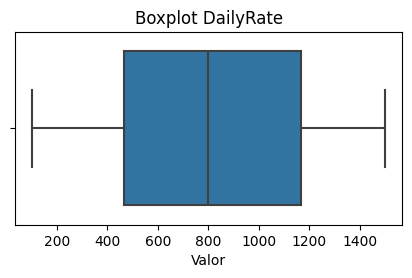

In [93]:
# Hacemos un Boxplot para ver la distribución de los datos
plt.figure(figsize=(5, 2.5))
sns.boxplot(x=df_HR['DailyRate'])
plt.title('Boxplot DailyRate')
plt.xlabel('Valor')
plt.show()

In [94]:
# Como la distribución de los datos es aproximadamente simétrica (los datos se distribuyen uniformemente alrededor del centro), la media es una buena medida central
df_HR['DailyRate'].fillna(df_HR['DailyRate'].mean(), inplace=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


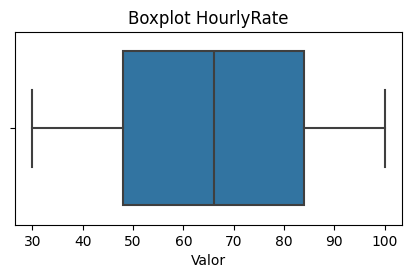

In [95]:
# Hacemos un Boxplot para ver la distribución de los datos
plt.figure(figsize=(5, 2.5))
sns.boxplot(x=df_HR['HourlyRate'])
plt.title('Boxplot HourlyRate')
plt.xlabel('Valor')
plt.show()

In [96]:
# Como la distribución de los datos es aproximadamente simétrica (los datos se distribuyen uniformemente alrededor del centro), la media es una buena medida central
df_HR['HourlyRate'].fillna(df_HR['HourlyRate'].mean(), inplace=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


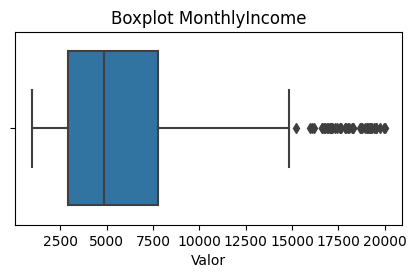

In [97]:
# Hacemos un Boxplot para ver la distribución de los datos
plt.figure(figsize=(5, 2.5))
sns.boxplot(x=df_HR['MonthlyIncome'])
plt.title('Boxplot MonthlyIncome')
plt.xlabel('Valor')
plt.show()

In [98]:
"""# Como la distribución de los datos es asimétrica, imputamos con la mediana
df_HR['MonthlyIncome'].fillna(df_HR['MonthlyIncome'].median(), inplace=True)"""

# Como el porcentaje de nulos es tan alto usaremos el método IterativeImputer, algo más preciso que la media y la meediana
# Instanciamos IterativeImputer
imputer_iterative = IterativeImputer(max_iter=20, random_state=42)

# Ajustamos y transformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_HR[["MonthlyIncome"]])

# Comprobamos el array imputado
print("\nArray imputado:")
print(imputer_iterative_imputado)

# Convertimos el resultado de vuelta a un DataFrame
df_HR["MonthlyIncome"] = imputer_iterative_imputado


Array imputado:
[[19537.        ]
 [19999.        ]
 [19232.        ]
 ...
 [ 6463.92307692]
 [ 6463.92307692]
 [ 6463.92307692]]


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


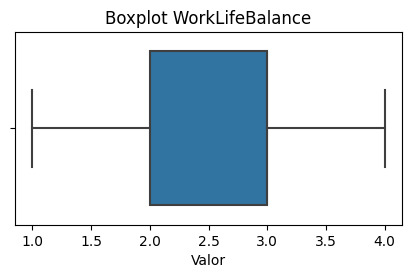

In [99]:
# Hacemos un Boxplot para ver la distribución de los datos
plt.figure(figsize=(5, 2.5))
sns.boxplot(x=df_HR['WorkLifeBalance'])
plt.title('Boxplot WorkLifeBalance')
plt.xlabel('Valor')
plt.show()

In [100]:
# Como la distribución de los datos es aproximadamente simétrica (los datos se distribuyen uniformemente alrededor del centro), la media es una buena medida central
df_HR['WorkLifeBalance'].fillna(df_HR['WorkLifeBalance'].mean(), inplace=True)

In [101]:
# Comprobamos que ahora ya no hay valores nulos en esas columnas
nulos_esta_num = df_HR[df_HR.columns[df_HR.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index([], dtype='object')


In [102]:
df_HR.to_csv('df_HR_limpio.csv', index=False)

### Crear los csv para importarlos como tablas en sql

In [103]:
#definimos las columnas que queremos en cada variable 

employee = ['Age', 'Gender', 'MaritalStatus', 'DateBirth', 'Education', 'EducationField', 'Attrition', 'BusinessTravel', 'DistanceFromHome' ]
job_details = ['JobRole','JobLevel', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
compensation = ['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','StockOptionLevel','PercentSalaryHike','OverTime','TrainingTimesLastYear','RemoteWork']
satisfaction = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance','PerformanceRating']


In [104]:
# Cargar el CSV y seleccionar solo las columnas deseadas
df = pd.read_csv('df_HR_limpio.csv', usecols=employee)
df1 = pd.read_csv('df_HR_limpio.csv', usecols=job_details)
df2 = pd.read_csv('df_HR_limpio.csv', usecols=compensation)
df3 = pd.read_csv('df_HR_limpio.csv', usecols=satisfaction)

In [105]:
df.to_csv('Employees.csv', index=False)
df1.to_csv('JobDetails.csv', index=False)
df2.to_csv('Compensation.csv', index=False)
df3.to_csv('Satisfaction.csv', index = False)

In [106]:
remote_work = pd.read_csv('Compensation.csv')
remote_work.sample(5)

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,RemoteWork
258,570.000000,66.0,6463.923077,16225,No,13,1,4,yes
40,803.129648,62.0,5914.000000,9945,No,16,0,3,yes
542,322.000000,59.0,6463.923077,9731,Unknown,11,1,3,yes
277,857.000000,59.0,3660.000000,7909,No,13,0,4,yes
216,488.000000,75.0,6463.923077,14977,Yes,12,1,2,no
